# Immigration statistics from the Middle East

Based on data published in Orfalea, Gregory. 2006. *The Arab Americans: A History.* Northampton, Mass: Olive Branch Press, pages 436-41.

In [51]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_theme()

# define formatter
def formatYAxis(chart):
    chart.set_yticklabels(['{:,}'.format(int(x)) for x in chart.get_yticks().tolist()])

## Number of Arrivals in the United States from Turkey in Asia, by Sex, 1869-1932

Sources:

* 1868-1898: *International Migration Statistics*, Vol 1, National Bureau of Economic Research, Inc. 1925. Table II-a "Distribution of Immigrant Aliens by Sex and Country of Origin," 1869-1898, pp. 418-31. (Orfaela 2006)
* 1899-1932: *International Migration Statistics*, Table X, pp. 432-43, for data to 1925. Data from 1925 on are found in *Annual Reports of Commissioner General of Immigration*, 1926-1933, Table(s) VIII, "Immigrant Aliens Admitted Fiscal Year Ending June 30 by Race or People, Sex and Age." (Orfaela 2006)

*Note: Some totals do not add correctly, possibly due to inconsistent records.*

<ipython-input-51-d15cb08fae0a>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_yticklabels(['{:,}'.format(int(x)) for x in chart.get_yticks().tolist()])


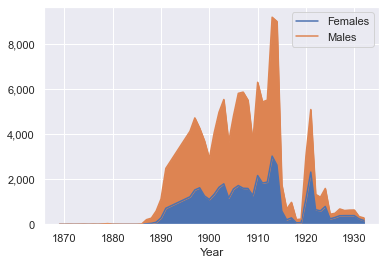

In [52]:
earlyData = pd.read_csv('./1869-1898-narrow.csv')
earlyData.set_index('Year').sort_values('Year')
# earlyData.tail() # test data load

turnOfCenturyData = pd.read_csv('./1899-1932-narrow.csv')
turnOfCenturyData.set_index('Year').sort_values('Year')
# turnOfCenturyData.tail() # test data load

combined = pd.concat([earlyData, turnOfCenturyData])
labels=["Females", "Males"]
pt = pd.pivot_table(combined, columns=['Sex'], index=['Year'], values=['Number'], fill_value=0)
byYearChartEarly = pt.plot.area()
byYearChartEarly.legend(labels=labels)
formatYAxis(byYearChartEarly)


<ipython-input-51-d15cb08fae0a>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_yticklabels(['{:,}'.format(int(x)) for x in chart.get_yticks().tolist()])


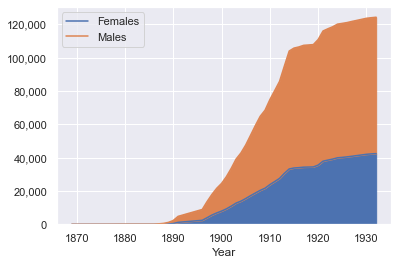

In [53]:
combinedDataCumulative = pt.cumsum()
cumulativeChartEarly = combinedDataCumulative.plot.area()
cumulativeChartEarly.legend(labels=labels)
formatYAxis(cumulativeChartEarly)

## Arab Immigration to the United States, 1948-2019

Sources:

* 1948-2003: U.S. Immigration and Naturalization Service. Data based on the country of birth of Immigrant (Orfala 2006)
* 2004-2013: [Department of Homeland Security, Office of Immigration Statistics, *2013 Yearbook of Immigration Statistics*, Table 3 (2014)](https://www.dhs.gov/immigration-statistics/yearbook/2013?collection=immigration-data-and-statistics)
* 2014-2016: [Department of Homeland Security, Office of Immigration Statistics, *2016 Yearbook of Immigration Statistics*, Table 3 (2017)](https://www.dhs.gov/immigration-statistics/yearbook/2016/table3)
* 2017-2019: [Department of Homeland Security, Office of Immigration Statistics, *2019 Yearbook of Immigration Statistics*, Table 3 (2020)](https://www.dhs.gov/immigration-statistics/yearbook/2019/table3)

*Notes: Countries are separated in the data, but combined in the chart for clarity and to account for inconsistencies in the coding of individual regions. This follows the listings published in Orfala (2006) and does not include countries like Afghanistan, South Sudan, Turkey, and others.*

<ipython-input-51-d15cb08fae0a>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_yticklabels(['{:,}'.format(int(x)) for x in chart.get_yticks().tolist()])


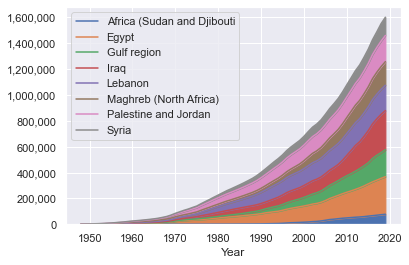

In [54]:
recentData = pd.read_csv('./1948-2019-narrow.csv')
recentData.set_index('Year').sort_values('Year')
# recentData.tail() # to check that data loaded
labels = ['Africa (Sudan and Djibouti', 'Egypt', 'Gulf region', 'Iraq', 'Lebanon', 'Maghreb (North Africa)', 'Palestine and Jordan', 'Syria']

pt = pd.pivot_table(recentData, columns=['Country'], index=['Year'], values=['Number'], fill_value=0)
cumulativeTable = pt.cumsum()
cumulativeChart = cumulativeTable.plot.area()
cumulativeChart.legend(labels=labels)
formatYAxis(cumulativeChart)

<ipython-input-51-d15cb08fae0a>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_yticklabels(['{:,}'.format(int(x)) for x in chart.get_yticks().tolist()])


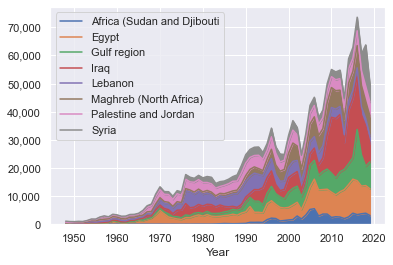

In [55]:
byYearChart = pt.plot.area()
byYearChart.legend(labels=labels)
formatYAxis(byYearChart)